# Project - Supervised Learning

## Column Description


Attribute Information:<br>
<br>
__ID__ : Customer ID<br>
__Age__ : Customer's age in completed years<br>
__Experience__ : Years of professional experience<br>
__Income__ : Annual income of the customer<br>
__ZIP Code__ : Home Address ZIP code.<br>
__Family__ : Family size of the customer<br>
__CCAvg__ : Avg. spending on credit cards per month<br>
__Education__ : Education Level.
1. Undergrad<br>
2. Graduate<br>
3. Advanced/Professional<br>

__Mortgage__ : Value of house mortgage if any.<br>
__Personal Loan__ : Did this customer accept the personal loan offered in
the last campaign?<br>
__Securities Account__ : Does the customer have a securities account with
the bank?<br>
__CD Account__ : Does the customer have a certificate of deposit (CD)
 account with the bank?<br>
__Online__ : Does the customer use internet banking facilities?<br>
__Credit card__ : Does the customer use a credit card issued by
 UniversalBank?<br>

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import pandas_profiling


In [2]:
#load dataset onto a dataframe

data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data.head() #top 5 items

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [3]:
data.shape

(5000, 14)

###  Studying the data distribution in each attribute

In [4]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### We can see that our dataset has 14 columns and 5000 rows.

All the columns are numeric in nature.

In [5]:
data.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### Judging by the 5 point summary, Mortgage, Income and CCAvg are heavily skewed as their mean is far away from their median(50%), respective to their scales.

Skewness of Mortgage is: 2.103371065804789


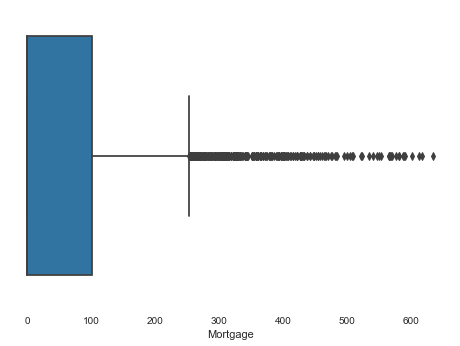

In [6]:
sns.boxplot(data["Mortgage"])
print(f"Skewness of Mortgage is: {stats.skew(data.Mortgage)}")

Skewness of Mortgage is: 0.8410861846424931


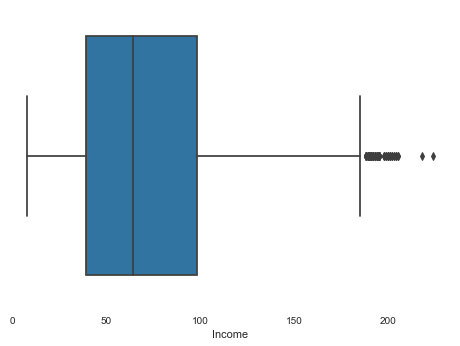

In [7]:
sns.boxplot(data["Income"])
print(f"Skewness of Mortgage is: {stats.skew(data.Income)}")

Skewness of Mortgage is: 1.5979637637001873


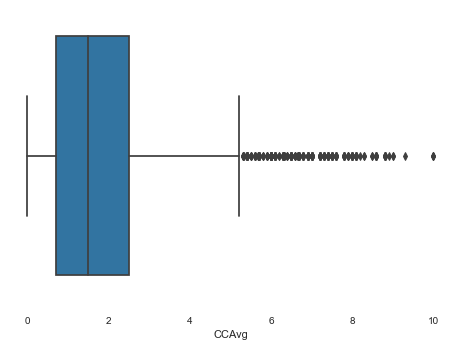

In [8]:
sns.boxplot(data["CCAvg"])
print(f"Skewness of Mortgage is: {stats.skew(data.CCAvg)}")

We can see the presence of outliers in the following variables

In [9]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Our dataset has no null or empty values.

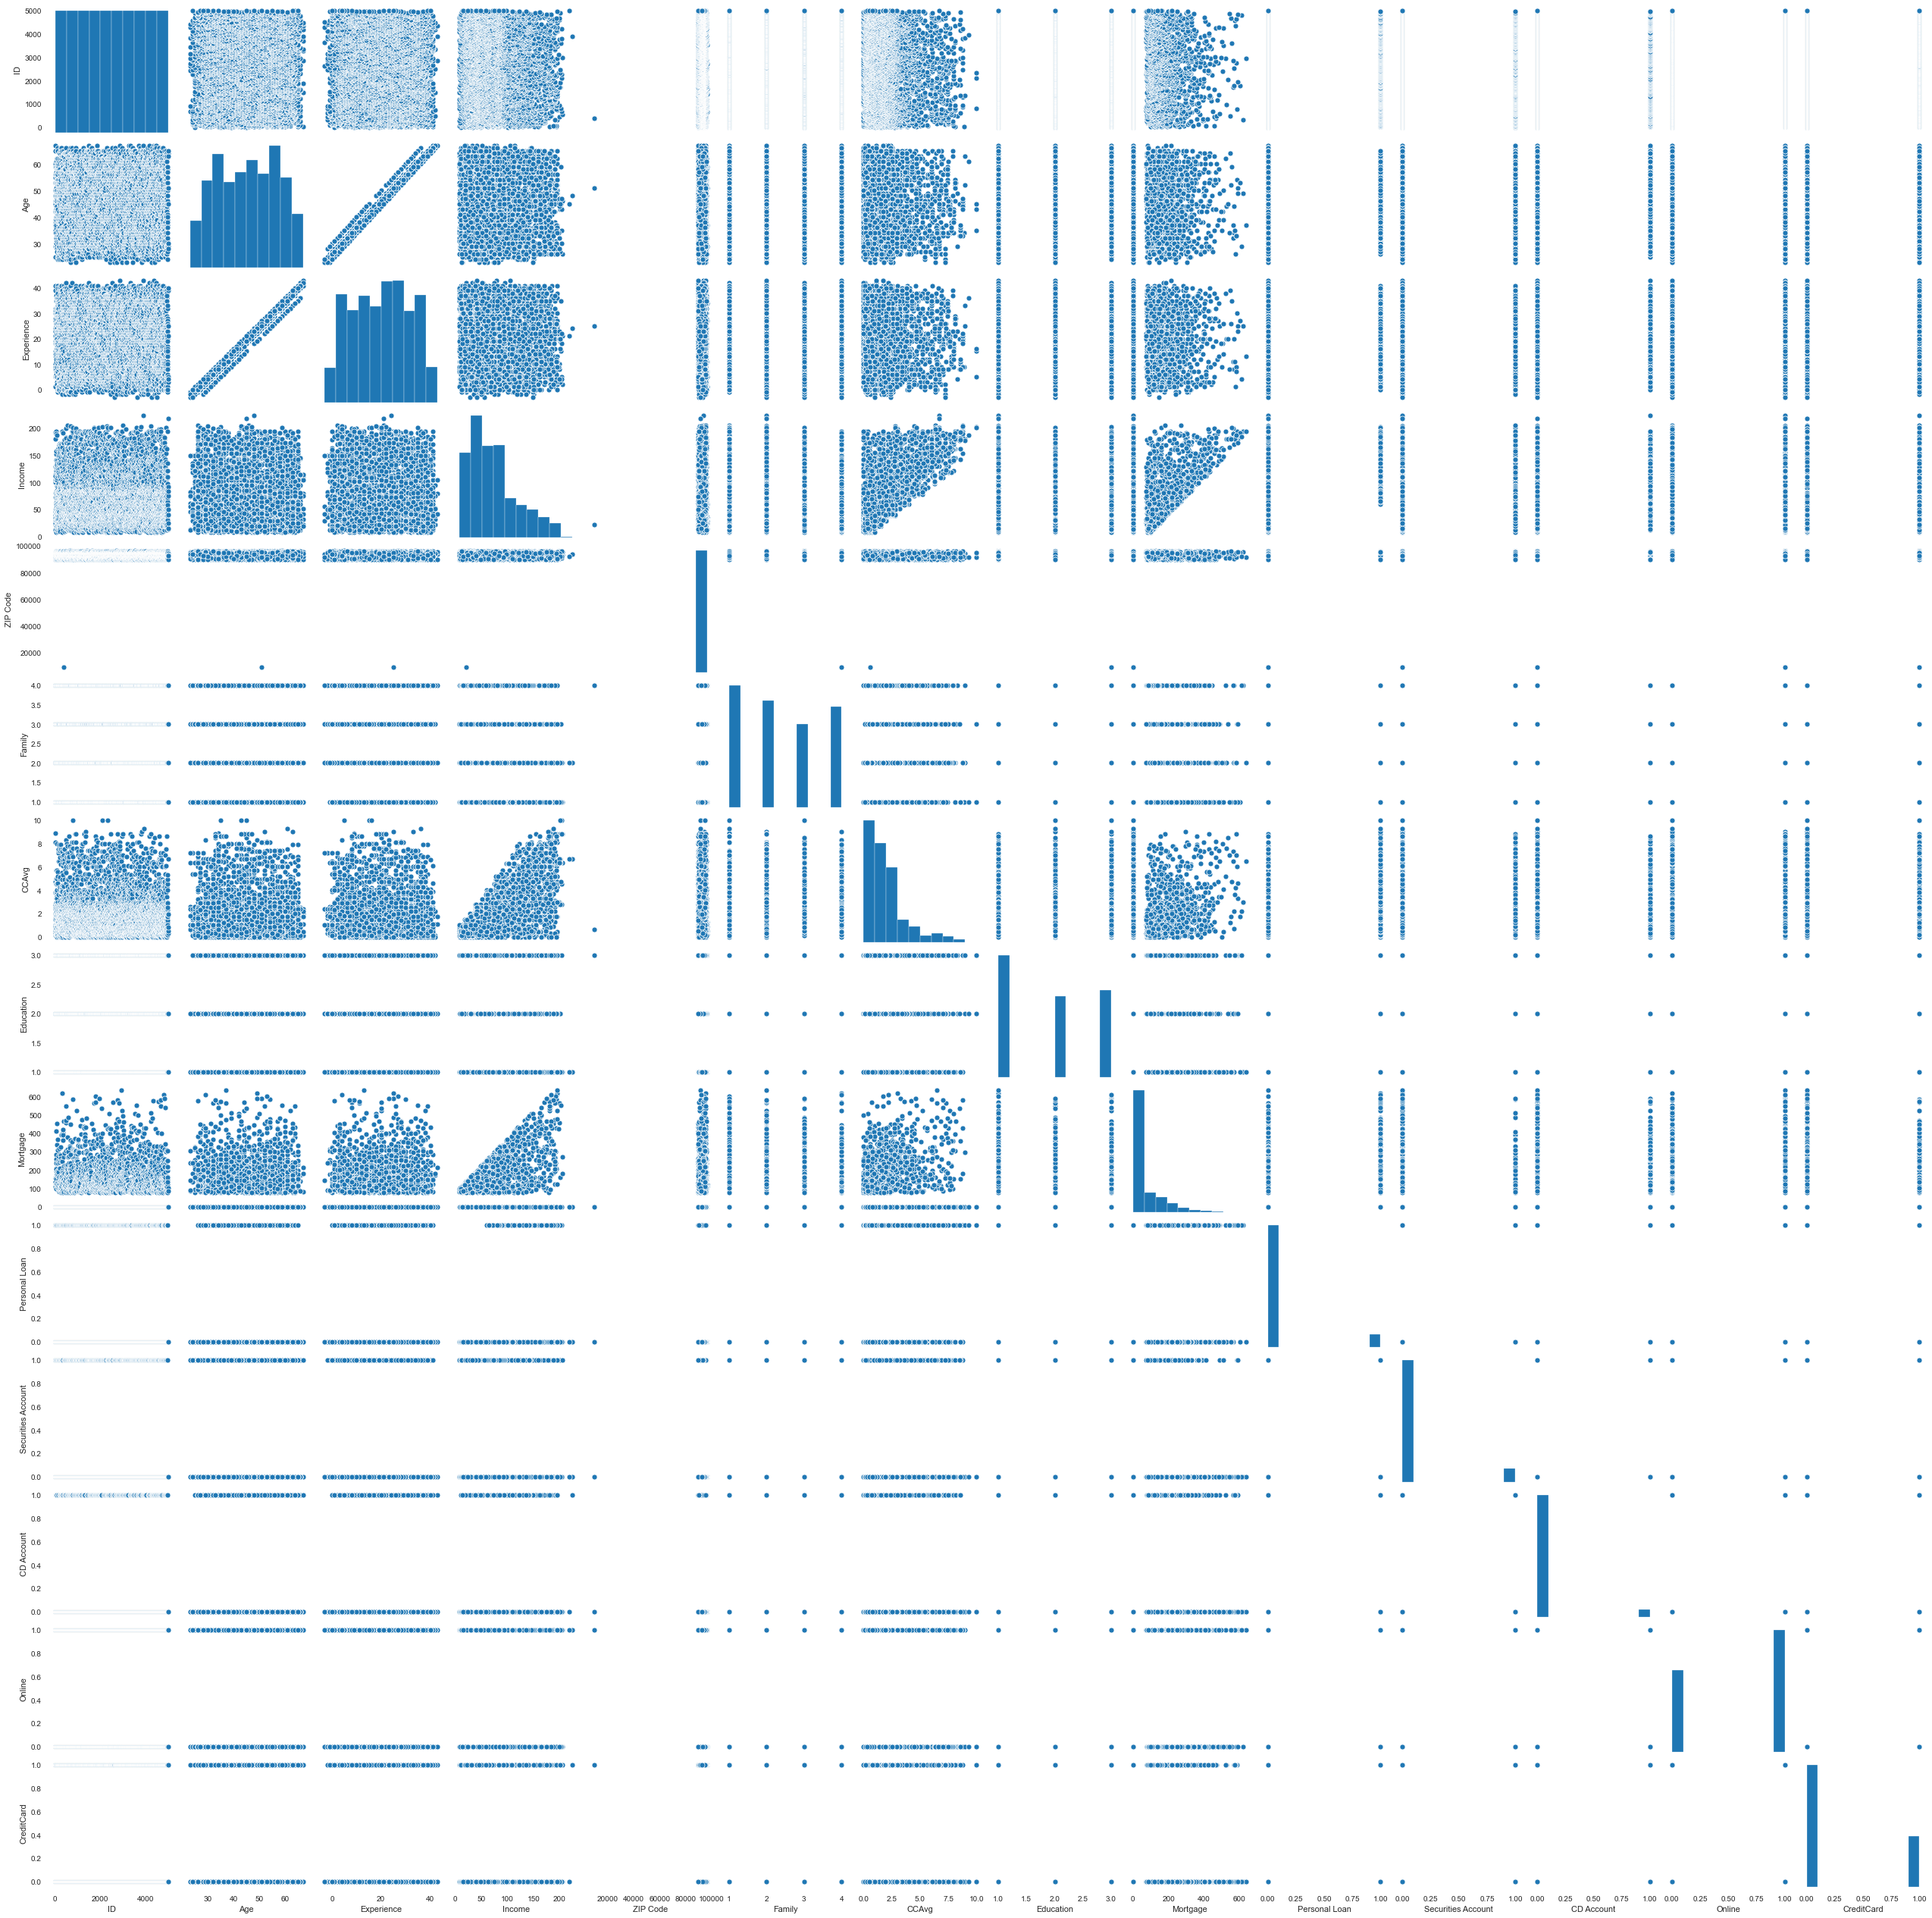

In [11]:
sns.pairplot(data)

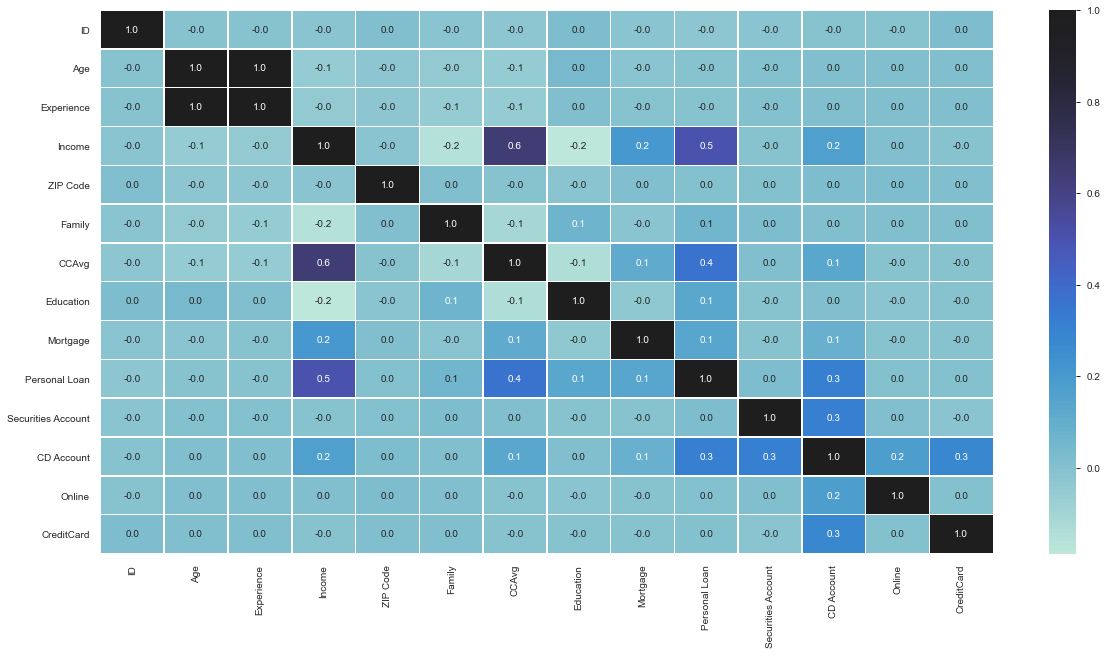

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

### Using pandas profiling to analyse data

In [13]:
profile = pandas_profiling.ProfileReport(data, title="Pandas Profiling Report")

profile.to_file("report.html")

In [14]:
profile

### Above is the full report of the dataset using pandas-profiling function.
1. Age and Education are highly correlated, so while selecting variables for making the model, we will drop one of the two columns.
2. Experience has a lot of negative values, which don't make any sense as experience can never be negative. We will correct them later by replacing them with 0 or the median.
3. The dataset has 0 missing values.
4. The variables have been divided into 3 categories:
- Numeric : ID, Age, Experience, Income, ZIP Code, CCAvg, Mortgage
- Categorical: Family and Education are categorical variables with 4 and 3 unique values respectively
- Binary/Boolean: Securities Account, CD Account, Online, CreditCard, Personal Loan are all boolean values which can take either 0 or 1. Among these, <u>Personal Loan</u> is our target variable
5. Among families, 29.4% people live alone, 25.9% people live in pairs, 24.4% people live in a group of 3 and 20.2% of people have a family of 4.
6. 41.9% of the candidates are undergrads, while 30% are professional and 28% are graduates.
7. 89.6% of people have a security account with the bank while 10.4% do not.
8. 71% of the customers doesn’t use a credit card issued by the bank.
9. 59.4% of customers use internet banking facilities.
10. 90.4% of the customers did not accept the personal loan offered in the last campaign.
11. 89.6% of the customer doesn’t have a securities account with the bank.
12. The mean age of a customer is 45 years with a standard deviation of 11.46.
13. The mean of avg. spending is 1.93 with standard deviation of 1.74
14. The mean annual income is 73.7742 with a standard deviation of 46.03
15. The mean value of house mortgage is 56.4988 with standard deviation of 101.71.
16. We will not include analysis of ZIP Code and ID as they are irrelevant for the model making.

#### Dividing the columns into 3 categories, as mentioned above: Numeric, Categorical and Binary

In [15]:
numerical = data[["Age","Experience","Income","CCAvg","Mortgage","ZIP Code"]]
categorical = data[["Family","Education"]]
binary = data[["Securities Account","CD Account","Online","CreditCard"]]

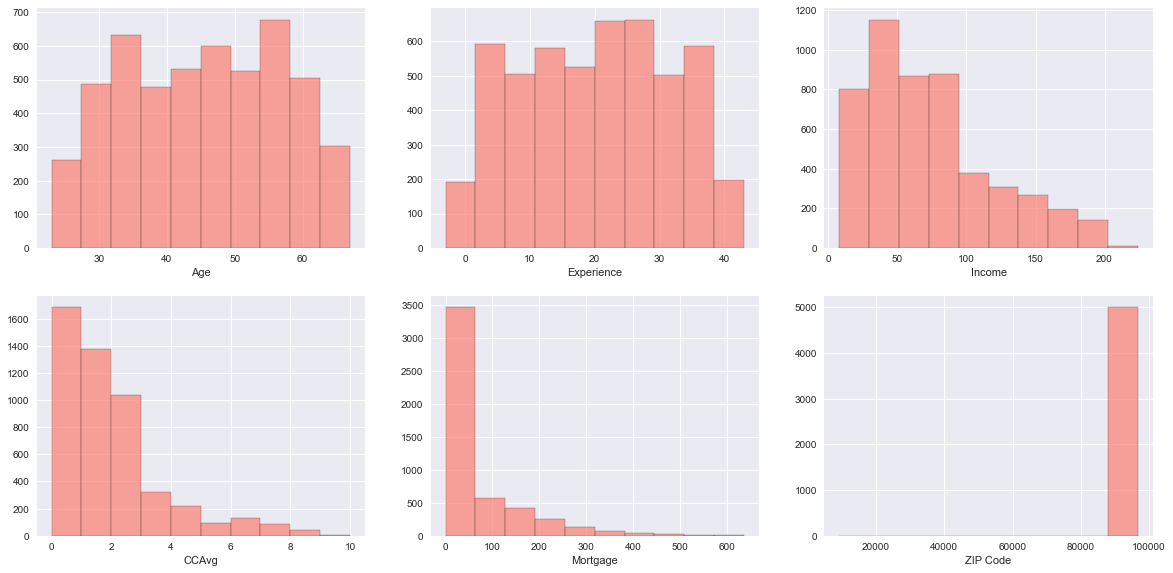

In [16]:
#Plots to see the distribution of the numerical features individually

plt.figure(figsize= (20,15))
plt.style.use("seaborn-darkgrid")
plt.subplot(3,3,1)
plt.hist(data["Age"], color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(3,3,2)
plt.hist(data["Experience"], color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')

plt.subplot(3,3,3)
plt.hist(data["Income"], color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income')

plt.subplot(3,3,4)
plt.hist(data["CCAvg"], color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CCAvg')

plt.subplot(3,3,5)
plt.hist(data["Mortgage"], color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Mortgage')

plt.subplot(3,3,6)
plt.hist(data["ZIP Code"], color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xlabel('ZIP Code')

plt.show()

Age and Experience are fairly uniformly distributed. 
Income, CCAvg and Mortage are right skewed with mortgage being the most skewed.
ZIP code has values centred around a particular area, but it is irrelevant to our model so we drop it.

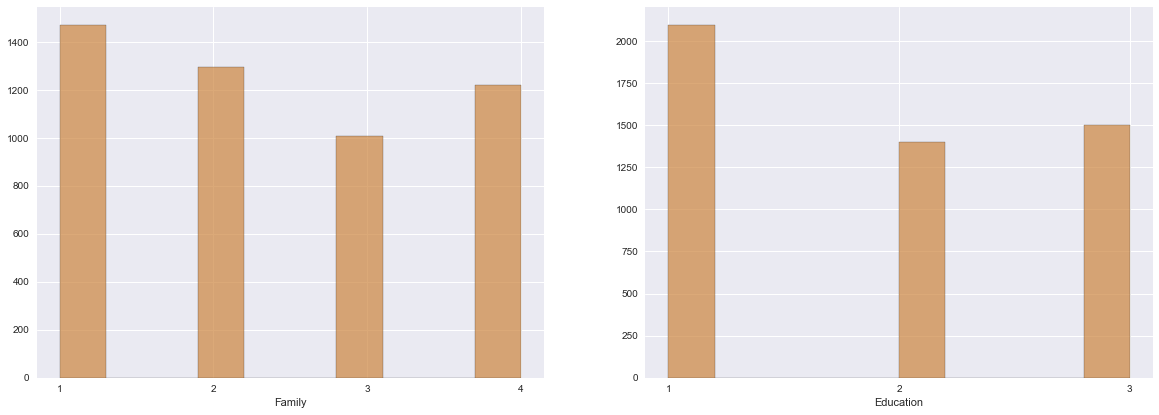

In [17]:
#Plots to see the distribution of the categorical features individually

plt.figure(figsize= (20,15))
plt.style.use("seaborn-darkgrid")
plt.subplot(2,2,1)
plt.hist(data["Family"], color='peru', edgecolor = 'black', alpha = 0.7)
plt.xticks([1,2,3,4])
plt.xlabel('Family')

plt.subplot(2,2,2)
plt.hist(data["Education"], color='peru', edgecolor = 'black', alpha = 0.7)
plt.xticks([1,2,3])
plt.xlabel('Education')

plt.show()

People who live alone are the most in this dataset. A family of 3 is the least in frequency.
<br>
Most people in this dataset are undergraduates with graduates being the least and professionals residing in between.

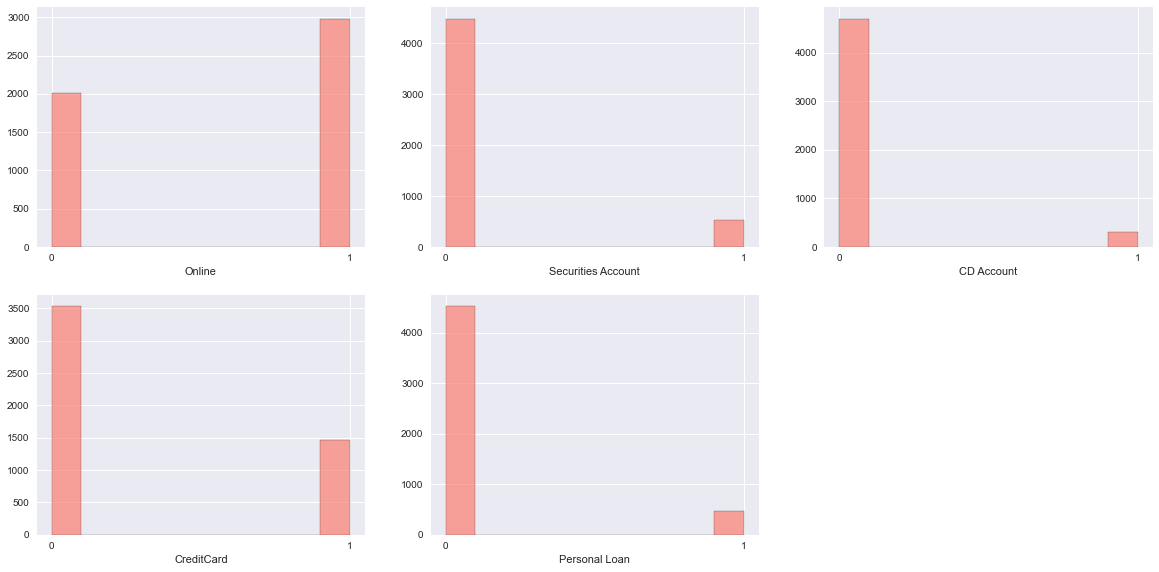

In [18]:
#Plots to see the distribution of the binary(0|1) features individually

plt.figure(figsize= (20,15))
plt.style.use("seaborn-darkgrid")
plt.subplot(3,3,1)
plt.hist(data["Online"], color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xticks([0,1])
plt.xlabel('Online')

plt.subplot(3,3,2)
plt.hist(data["Securities Account"], color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xticks([0,1])
plt.xlabel('Securities Account')

plt.subplot(3,3,3)
plt.hist(data["CD Account"], color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xticks([0,1])
plt.xlabel('CD Account')

plt.subplot(3,3,4)
plt.hist(data["CreditCard"], color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xticks([0,1])
plt.xlabel('CreditCard')

plt.subplot(3,3,5)
plt.hist(data["Personal Loan"], color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xticks([0,1])
plt.xlabel("Personal Loan")

plt.show()

The number of people using online banking is more than the people who don't. <br>
Most people in this dataset don't have a security account.<br>
Most people in this dataset don't have a Certificate of Deposit account.<br>
The number of people who don't own a credit card is more than twice the number of people who do.<br>
Most peple had rejected a loan in the previous campaign.

## Analysing target variable

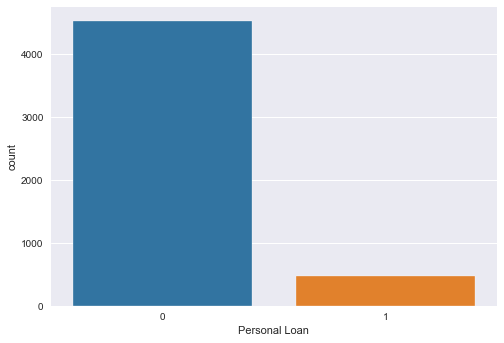

In [19]:
sns.countplot(data["Personal Loan"])

In [20]:
print("Original Loan True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original Loan False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))

Original Loan True Values    : 480 (9.60%)
Original Loan False Values   : 4520 (90.40%)


The output variable is spread in the ratio of 9.60:90.4

## Plotting Categorical Values vs Target Variable

<Figure size 576x396 with 0 Axes>

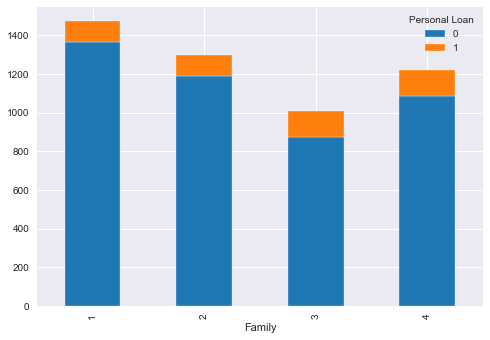

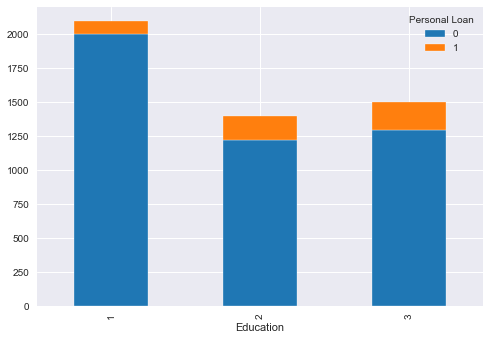

In [21]:
for i, col in enumerate(categorical.columns):
    plt.figure(i)
    df_plot = data.groupby(['Personal Loan', col]).size().reset_index().pivot(columns='Personal Loan', index=col, values=0);
    df_plot.plot(kind='bar', stacked=True);

#### The number of people in a family doesnt affect taking a loan as much.
#### Professionals tend to take a loan more than undergrads and graduates.

## Plotting Binary Values vs Target Variable

<Figure size 576x396 with 0 Axes>

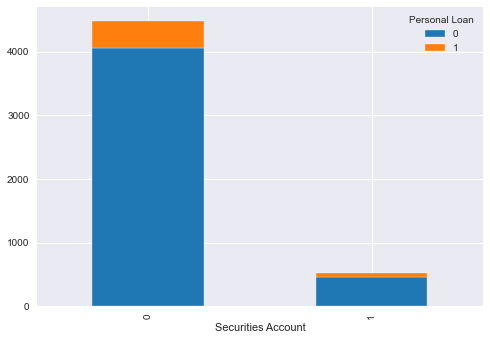

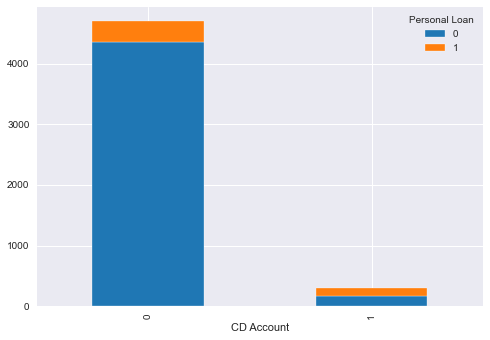

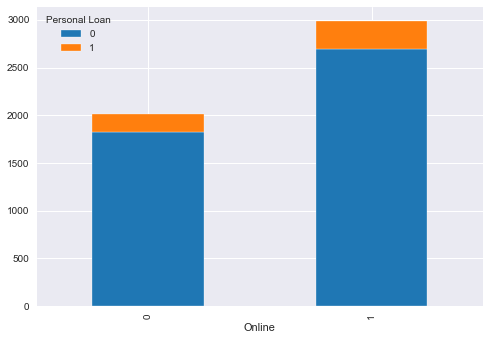

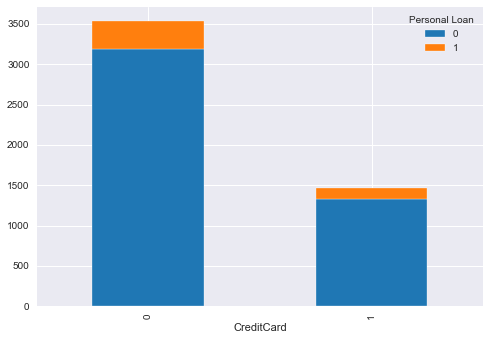

In [22]:
for i, col in enumerate(binary.columns):
    plt.figure(i)
    df_plot = data.groupby(['Personal Loan', col]).size().reset_index().pivot(columns='Personal Loan', index=col, values=0);
    df_plot.plot(kind='bar', stacked=True);

#### People who don't have a securities account tend to take a loan as compared to people to do.
#### People who have a CD account as more susceptible to take a loan.
#### People who use online banking tend to take a loan more often than people who don't use online banking.
#### People who own a credit card are more susceptible to taking a loan.

## Plotting Numeric Values vs Target Variable

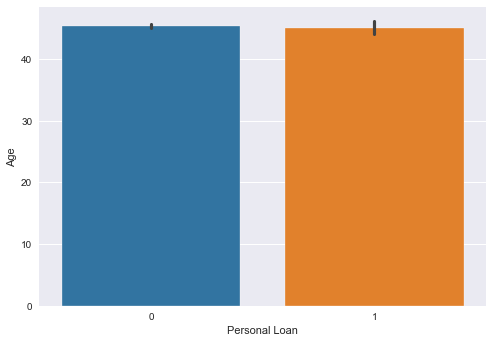

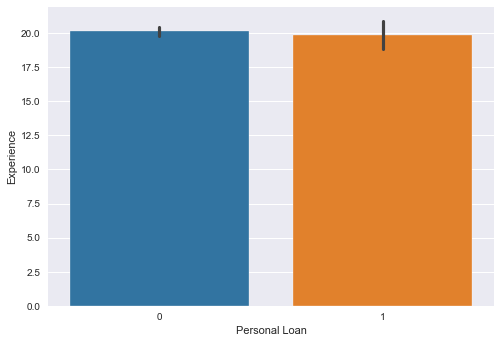

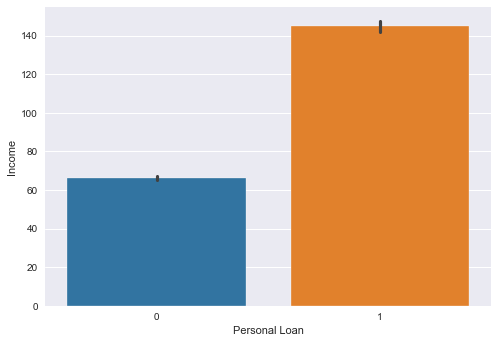

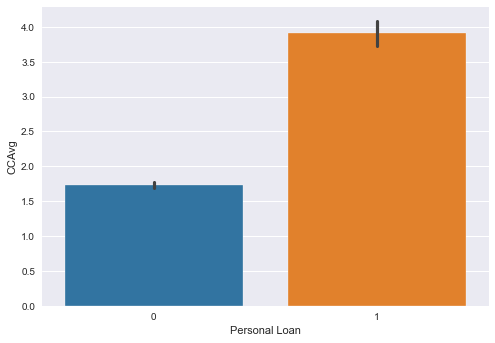

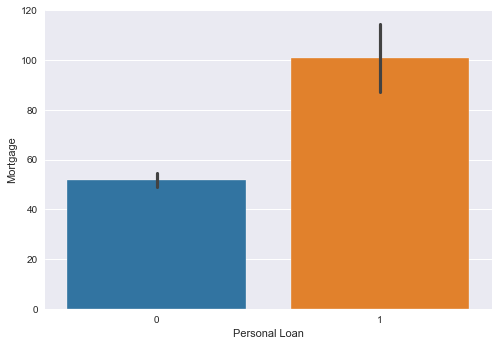

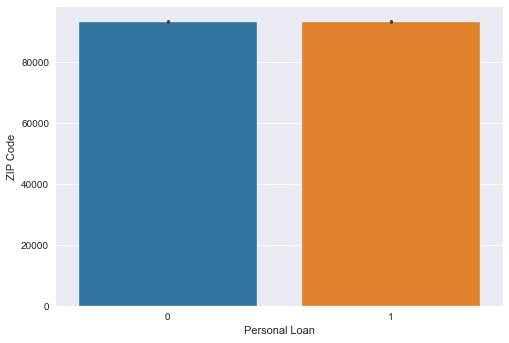

In [23]:
for i, col in enumerate(numerical.columns):
    plt.figure(i)
    plt.xlabel('Personal Loan');
    plt.ylabel(col);
    sns.barplot(y=col, data=data, x="Personal Loan")

#### It can be seen that Age and Experience don't affect the probability of buying a loan very much.
#### People with high avg income are more prone to buying a personal loan.
#### People who spend more on their credit card are more susceptible to buying a loan, compared to people who spend less.
#### People with higher mortgage tend to buy a loan more than people who have lower mortgage
#### People who earn more are more likely to get a personal loan.

#### There are 52 negative values in Experience column.

In [24]:
data[data['Experience'] < 0]['Experience'].count()

52

In [25]:
median_exp = data.loc[:,"Experience"].median()
median_exp

20.0

In [26]:
data.loc[:, 'Experience'].replace([-1, -2, -3], [median_exp, median_exp, median_exp], inplace=True)

In [27]:
data[data['Experience'] < 0]['Experience'].count()

0

No more negative values left in Experience column.

In [28]:
n_true = len(data.loc[data['Personal Loan'] == True])
n_false = len(data.loc[data['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


## Few of our numerical features were right skewed. We shall scale them before training our models as they will give us better results.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() ## standard scaling function

In [30]:
## scaling all numeric features and adding them as columns to our dataframe

data["MortgageScaled"]=scaler.fit_transform(data[["Mortgage"]])
data["IncomeScaled"]=scaler.fit_transform(data[["Income"]])
data["CCAvgScaled"]=scaler.fit_transform(data[["CCAvg"]])
data["ExperienceScaled"]=scaler.fit_transform(data[["Experience"]])

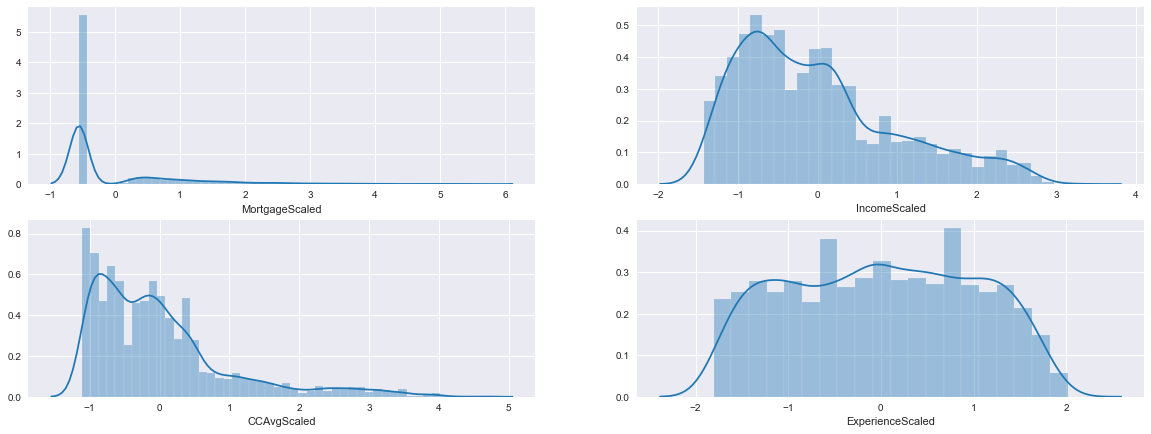

In [31]:
plt.figure(figsize= (20,15))

plt.subplot(4,2,1)
sns.distplot(data["MortgageScaled"])

plt.subplot(4,2,2)
sns.distplot(data["IncomeScaled"])

plt.subplot(4,2,3)
sns.distplot(data["CCAvgScaled"])

plt.subplot(4,2,4)
sns.distplot(data["ExperienceScaled"])



In [32]:
data.head()

#new dataframe with scaled columns

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25         1.0      49     91107       4    1.6          1         0   
1   2   45        19.0      34     90089       3    1.5          1         0   
2   3   39        15.0      11     94720       1    1.0          1         0   
3   4   35         9.0     100     94112       1    2.7          2         0   
4   5   35         8.0      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   MortgageScaled  IncomeScaled  CCAvgScaled  ExperienceScaled  
0       -0.555524     -0.538229    -0.193385         -1.717717  
1       -0.555524     -0.864109    -0.250611         -0.117989  
2       -0.555524     -1.363793    -0.536736         -0.473484  
3       -0.555524      0.569765     0.436091         -1.006727  
4       -0.555524     -0.625130    -0.536736         -1.095601

We will remove "Age" from training labels as it was highly correlated with Experience and we will only use one.<br>
We will remove "ZIP Code" from training labels as it was irrelevant to our model.

## Splitting data into test and train sets

In [33]:
from sklearn.model_selection import train_test_split
# Predictor feature columns
# Removing a few columns so that out models performs better
# also removing original values of scaled columns
X = data.drop(labels=['Personal Loan', "ID","ZIP Code","Experience","Age","Mortgage","Income","CCAvg"],axis=1) 

# Predicted class
Y = data['Personal Loan'] 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

Family  Education  Securities Account  CD Account  Online  CreditCard  \
1334       2          1                   0           0       1           0   
4768       1          2                   0           0       1           0   
65         1          1                   0           0       1           1   
177        4          2                   0           0       0           0   
4489       3          2                   0           0       1           0   

      MortgageScaled  IncomeScaled  CCAvgScaled  ExperienceScaled  
1334       -0.555524     -0.842384    -0.365061          0.148633  
4768       -0.555524     -0.755483     0.035515         -0.562358  
65         -0.555524      1.243252     1.065567          1.303992  
177         1.843604     -0.190623    -0.078935         -1.539970  
4489       -0.555524     -1.146539    -0.994537         -0.651232

In [34]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [35]:
print("Training Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training Loan True Values    : 331 (9.46%)
Training Loan False Values   : 3169 (90.54%)

Test Loan True Values        : 149 (9.93%)
Test Loan False Values       : 1351 (90.07%)



### The ratio of true-to-false remains consistent in all sets

# Building Models

# 1. Logistic Regression

In [36]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)

y_predict ##our predicted values on test set


array([0, 0, 0, ..., 0, 0, 0])

In [37]:
model_score_train = model.score(x_train, y_train)
print(model_score_train)

0.9517142857142857


In [38]:
model_score_test = model.score(x_test, y_test)
print(model_score_test)

0.9453333333333334


### We have got an accuracy of 94.53%


#### Confusion Matrix for logistic regression

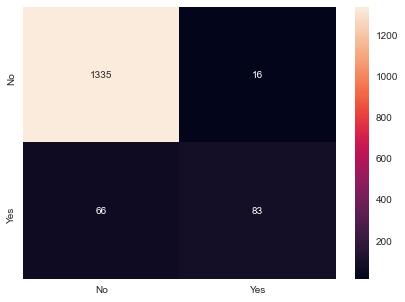

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [40]:
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.84      0.56      0.67       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.90      0.77      0.82      1500
weighted avg       0.94      0.95      0.94      1500



In [41]:
# ROC curve and area under the curve for logistic
LRprob=model.predict_proba(x_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test, LRprob[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.954093


#### We got a recall value of 56%, that means our model predicts 56% of 1s as 1.
#### Area under curve is a good 95%.
#### f1 score is 67% on 1s.
#### Accuracy is 94.53%

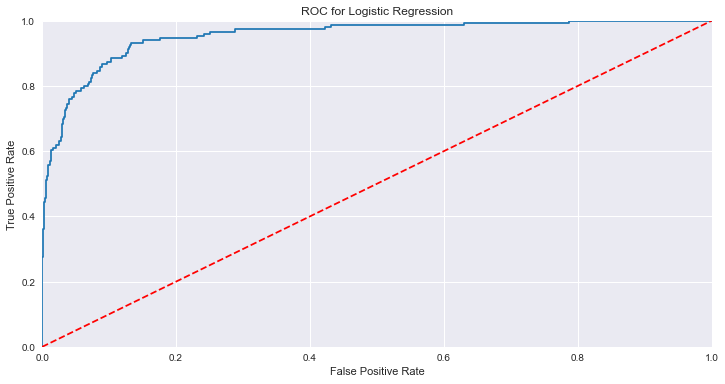

In [42]:
#ROC Curve for logistic regression

plt.figure(figsize = (12,6))
plt.plot(fpr1,tpr1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# 2.  KNN Classifier

#### Trying out various values of n to get best accuracy

In [43]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(f"Score for k=3: {accuracy_score(y_test, y_pred)}")

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(f"Score for k=5: {accuracy_score(y_test, y_pred)}")

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(f"Score for k=9: {accuracy_score(y_test, y_pred)}")

knn = KNeighborsClassifier(n_neighbors = 11)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(f"Score for k=11: {accuracy_score(y_test, y_pred)}")

Score for k=3: 0.9606666666666667
Score for k=5: 0.9573333333333334
Score for k=9: 0.9533333333333334
Score for k=11: 0.9506666666666667


As evident, n=3 gives best accuracy.

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(x_train, y_train)
train_score = knn.score(x_train, y_train)
print(f"Test Score for KNN: {train_score}")


# predict the response
y_pred = knn.predict(x_test)
test_score = knn.score(x_test, y_test)


# evaluate test accuracy
print(f"Test Score for KNN: {test_score}")

Test Score for KNN: 0.9794285714285714
Test Score for KNN: 0.9606666666666667


### We get an accuracy of 97.94% on train set and 96.06% on test set

Confusion Matrix:

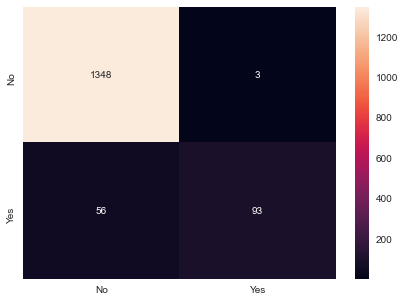

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Classfication report:

In [46]:
print(metrics.classification_report(y_test, y_pred, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.97      0.62      0.76       149
           0       0.96      1.00      0.98      1351

    accuracy                           0.96      1500
   macro avg       0.96      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [47]:
# ROC curve and area under the curve for kNN
knnprob=knn.predict_proba(x_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, knnprob[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.889349


#### We got a recall value of 62%, that means our model predicts 62% of 1s as 1.
#### Area under curve is a 88%.
#### f1 score is 76% on 1s.
#### Accuracy is 97.94%

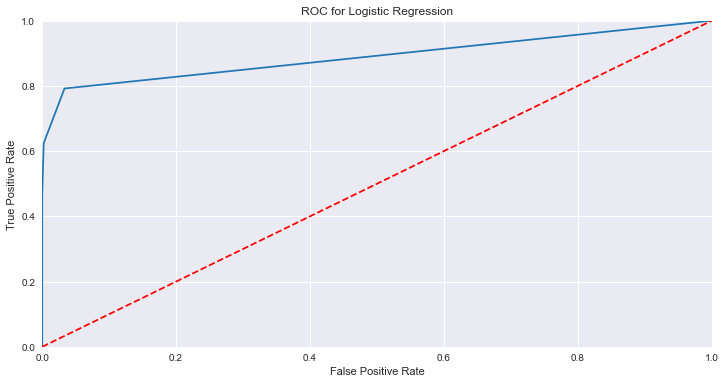

In [48]:
#ROC Curve for kNN

plt.figure(figsize = (12,6))
plt.plot(fpr2,tpr2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# 3. Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn.naive_bayes import BernoulliNB # using Bernoulli algorithm from Naive Bayes

# create the model
gauss = GaussianNB()
bern = BernoulliNB()

gauss.fit(x_train, y_train)
print(f"Test Accuracy for GaussianNB: {gauss.score(x_train, y_train)}")
bern.fit(x_train, y_train)
print(f"Test Accuracy for BernoulliNB: {bern.score(x_train, y_train)}")

Test Accuracy for GaussianNB: 0.89
Test Accuracy for BernoulliNB: 0.9197142857142857


In [50]:
y_pred_gauss = gauss.predict(x_test)
y_pred_bern = bern.predict(x_test)

from sklearn import metrics

print(f"Test Accuracy for GaussianNB: {metrics.accuracy_score(y_test, y_pred_gauss)}")
print(f"Test Accuracy for BernoulliNB: {metrics.accuracy_score(y_test, y_pred_bern)}")

Test Accuracy for GaussianNB: 0.8753333333333333
Test Accuracy for BernoulliNB: 0.9113333333333333


### As evident, Bernoulli Naive Bayes has a higher accuracy of 91.13% on test dataset

Confusion Matrix:

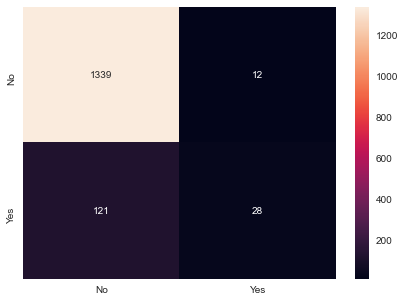

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bern, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Classification Report:

In [52]:
print(metrics.classification_report(y_test, y_pred_bern, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.70      0.19      0.30       149
           0       0.92      0.99      0.95      1351

    accuracy                           0.91      1500
   macro avg       0.81      0.59      0.62      1500
weighted avg       0.90      0.91      0.89      1500



In [53]:
# ROC curve and area under the curve for Naive Bayes
NBprob=bern.predict_proba(x_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, NBprob[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve : %f" % roc_auc3)

Area under the ROC curve : 0.856967


#### We got a recall value of 19%, that means our model predicts 19% of 1s as 1.
#### Area under curve is a 85%.
#### f1 score is 30% on 1s.
#### Accuracy is 91.13%

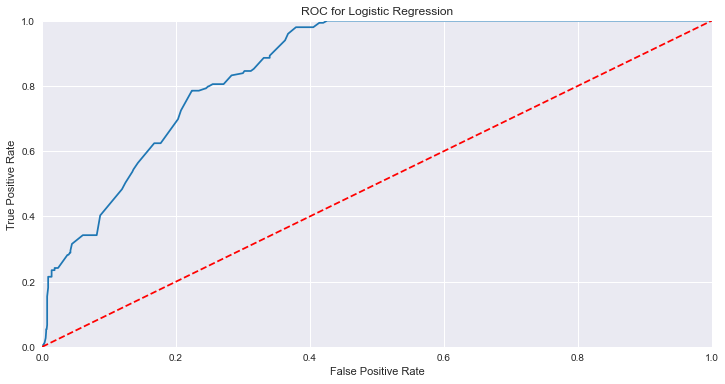

In [54]:
#ROC Curve for NB

plt.figure(figsize = (12,6))
plt.plot(fpr3,tpr3)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## ROC Curve for three of the models together

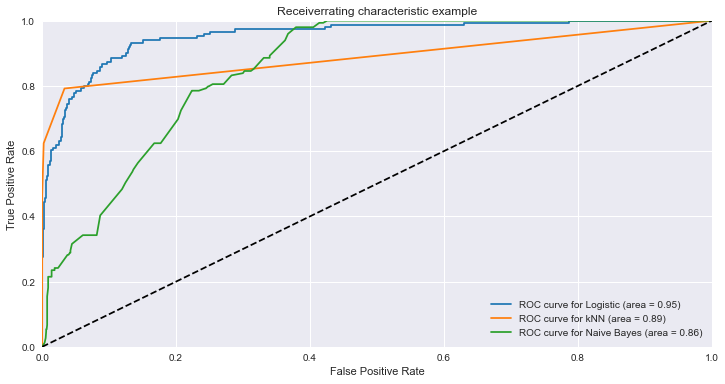

In [55]:
# Plot ROC curve
plt.figure(figsize = (12,6))
plt.plot(fpr1, tpr1, label='ROC curve for Logistic (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='ROC curve for kNN (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='ROC curve for Naive Bayes (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [56]:
print(f"Accuracy of LR: {model_score_test}")
print(f"Accuracy of kNN: {test_score}")
print(f"Accuracy of NB: {metrics.accuracy_score(y_test, y_pred_bern)}")

Accuracy of LR: 0.9453333333333334
Accuracy of kNN: 0.9606666666666667
Accuracy of NB: 0.9113333333333333


In [57]:
print("Recall of LR: 0.56")
print("Recall of kNN: 0.62")
print("Recall of NB: 0.19")

Recall of LR: 0.56
Recall of kNN: 0.62
Recall of NB: 0.19


## From the above values of precision on the True (1) and accuracy, it can be concluded that kNN is the best model to use in this dataset as it has the highest values of precision and accuracy. 

## Part of why kNN did much better than Logistic Regression and Naive Bayes was due to the fact that kNN performs well even in the presence of outliers.  

## Our dataset had numerical values which were very skewed, hence kNN performed much better than the rest two when it came to classifying, or in this case, predicting the likelihood of a customer buying personal loans